# The Effect of Tuition Fees and Financial Stress on Academic Performance
### Christin Wang, Manan Shah, Shreya Ladva, Samuel Griffin

# 1. Libraries

In [7]:
library(readxl)
library(tidyverse)
library(haven)
library(dplyr)
library(scales)
library(stargazer)
library(car)
library(GGally)
library(ggplot2)
library(ggcorrplot)
library(estimatr)
library(sandwich)
library(stargazer)
library(lmtest)

# 2. Data Preperation

In [14]:
url <- "https://raw.githubusercontent.com/Speculatorrr/ECON326/d0e554d0459664e17c4489ca8c08f9e1f0e2406c/Student%20Performance%20Survey%20-%20March%202025.xlsx"
temp_file <- tempfile(fileext = ".xlsx")
download.file(url, temp_file, mode = "wb")
df_ <- read_excel(temp_file)

In [15]:
colnames(df_) <- c(
    "GPA_percent", "GPA_scale", "single_study", "all_study", "exam_prepare",
    "course_take", "course_preference", "AI_use", "AI_help", "review",
    "hw", "sport", "club", "volunteer", "friend",
    "family", "student", "tuition", "aid", "aid_coverage",
    "job", "work", "finance", "sleep", "media",
    "screen", "anxiety", "commute", "transport", "course_mode",
    "future_work","future_edu", "confidence", "career", "faculty", 
    "ethnicity", "year")

1. `GPA_percent`: What is your current cumulative GPA (on a percentage scale)? Example: 75%  
2. `GPA_scale`: What is your current GPA on a 4.0 scale (if known)? Example: 3.51  
3. `single_study`: How many hours per week do you study for this course? Example: 9  
4. `all_study`: How many total hours per week do you study across all your courses? Example: 21  
5. `exam_prepare`: How many hours do you spend preparing for exams (excluding regular coursework)? Example: 8  
6. `course_take`: How many courses do you take on average per term? Example: 4  
7. `course_preference`: Do you prefer courses that focus more on practical applications or theoretical concepts?  
8. `AI_use`: How many hours per week do you use ChatGPT or other LLM or AI tools for studying or assignments? Example: 12  
9. `AI_help`: How do you feel AI tools like ChatGPT impact your learning? (5 = Strongly helps, 1 = Strongly harms)  
10. `review`: How much time per week do you spend on reviewing lecture slides and course materials? Example: 6  
11. `hw`: How much time per week do you spend on assignments, problem sets, and practice exercises? Example: 5  
12. `sport`: How many hours per week do you spend on sports or fitness activities? Example: 4  
13. `club`: How many hours per week do you spend on student clubs or societies? Example: 5  
14. `volunteer`: How many hours per week do you spend on volunteering or community service? Example: 3  
15. `friend`: How many hours per week do you spend socializing with friends? Example: 6  
16. `family`: How many hours per week do you spend socializing with family (online and in-person together)? Example: 8  
17. `student`: Are you an international, domestic, or exchange student? If you are an exchange student, just choose "Exchange" below.  
18. `tuition`: What is your average tuition fee per course? Example: 3200  
19. `aid`: Do you receive any scholarships or financial aid?  
20. `aid_coverage`: If you receive scholarships or financial aid, what percentage of your tuition does it cover? Example: 50%. If you do not get a scholarship or financial aid, just enter "0".  
21. `job`: Do you currently have a job while studying?  
22. `work`: How many hours per week do you work? Example: 12. Put "0" if you are not working.  
23. `finance`: Do you feel that your financial situation affects your academic performance? (5 = Significantly affects, 1 = No impact at all)  
24. `sleep`: How many hours of sleep do you get on an average night? Example: 6  
25. `media`: How much time do you spend daily on social media (in minutes)? Example: 200  
26. `screen`: How much time do you spend daily on screens (computer, phone, TV) for non-academic purposes (in minutes)? Example: 120  
27. `anxiety`: How often do you feel depressed or anxious these days? (5 = Very frequently, 1 = Never)  
28. `commute`: How long is your commute to campus (one way, in minutes)? Example: 25. If you live on campus, just write the walk time on average in minutes to your classes.  
29. `transport`: What is your primary mode of transportation to campus?  
30. `course_mode`: Do you prefer taking online courses, in-person courses, or a hybrid of both?
30. `future_work`: How often do you think about your future employment or career prospects? (5 = Constantly, 1 = Never)  
31. `future_edu`: Do you plan to pursue further education (graduate school, professional certification, etc.)?  
32. `confidence`: How confident are you in securing a job related to your field of study after graduation? (5 = Very confident, 1 = Not confident at all)  
33. `career`: Which career path are you most likely to pursue after graduation? (Select the option that best matches your current career goal)  
34. `faculty`: Which faculty are you in? (Select the faculty that best matches your program of study). Faculty of Arts is very vast so please google or use AI.  
35. `ethnicity`: What is your ethnicity?  
36. `year`: Which year are you in at your undergraduate program at UBC? (1 = First Year, 5 = Fifth Year or beyond)

In [19]:
df_$GPA_percent <- as.numeric(gsub("%", "", df_$GPA_percent))
df_$aid_coverage <- as.numeric(gsub("%", "", df_$aid_coverage))

df_[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)] <- 
  lapply(df_[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)], function(x) as.numeric(as.character(x)))

df_[] <- lapply(df_, function(x) {
  if (is.character(x)) as.factor(x) else x
})

df_ <- df_[-94,]
df_$course_take <- factor(round(df_$course_take))
df <- filter(df_,
  (student == "Domestic (Canadian student)" & tuition >= 300 & tuition <= 1000) | 
  (student != "Domestic (Canadian student)"& tuition <= 10000) ) |>
  filter(tuition != 0)
df <- drop_na(df)
df <- df[-37,] #drop the only 6 course person
head(df)

Warning message:
"强制改变过程中产生了NA"
Warning message:
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"


Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"


GPA_percent,GPA_scale,single_study,all_study,exam_prepare,course_take,course_preference,AI_use,AI_help,review,⋯,commute,transport,course_mode,future_work,future_edu,confidence,career,faculty,ethnicity,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
86.0,3.76,8,30,30,5,More practical applications,1,5,2,⋯,25,Public transit,Hybrid (mix of both),3,Yes,3,"Finance, Banking, or Investment",Faculty of Arts,East Asian,3
78.6,3.38,1,5,4,5,More practical applications,2,5,1,⋯,20,Walking,Online courses,5,Unsure,1,"Finance, Banking, or Investment",Faculty of Commerce and Business Administration (Sauder School of Business),East Asian,3
74.9,3.10,4,20,20,5,More practical applications,5,5,5,⋯,25,Public transit,Hybrid (mix of both),5,No,3,"Finance, Banking, or Investment",Faculty of Arts,East Asian,2
78.0,3.50,7,35,20,5,More practical applications,2,4,10,⋯,25,Public transit,In-person courses,4,Yes,4,"Finance, Banking, or Investment",Faculty of Arts,White,2
79.4,3.50,4,20,8,4,More practical applications,4,4,2,⋯,5,Biking,Hybrid (mix of both),5,No,4,Date Science or AI,Faculty of Arts,South Asian,2
74.0,3.00,1,4,7,5,More theoretical concepts,1,4,1,⋯,90,Public transit,Hybrid (mix of both),4,Unsure,2,"Finance, Banking, or Investment",Faculty of Arts,East Asian,3


# 3. Summary Statistics

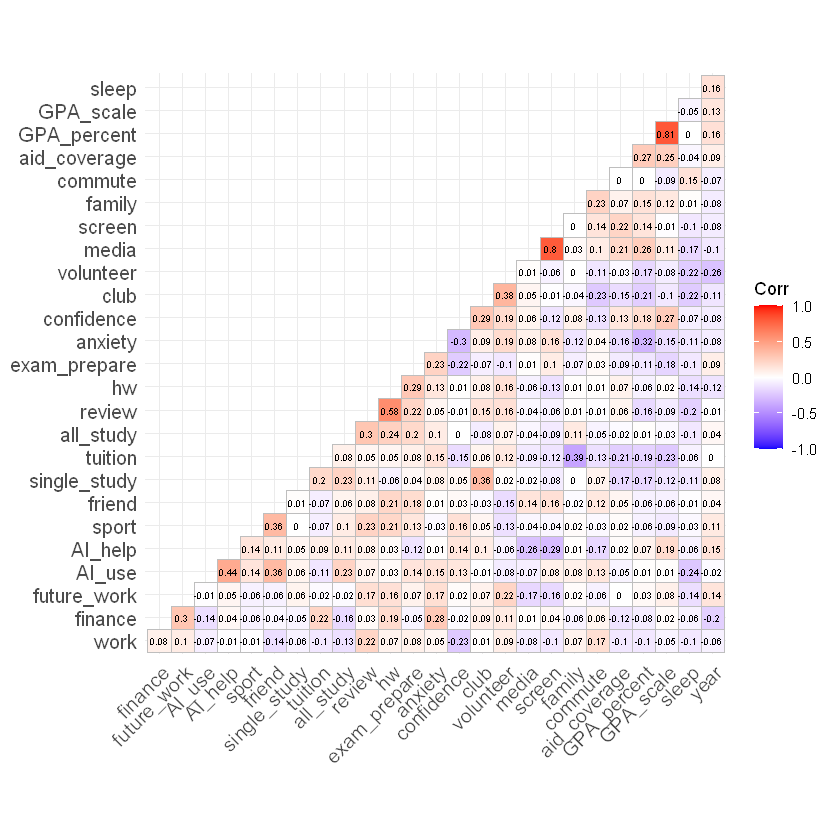

In [20]:
numeric_vars <- df[, c(1:5, 8:16, 18, 20, 22:28, 31, 33, 37)]

cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

cor_plot <- ggcorrplot(cor_matrix, hc.order = TRUE, type = "lower",
           lab = TRUE, lab_size = 2, colors = c("blue", "white", "red")) 


cor_plot

In [21]:
key_var <- df[,c(1,4,6,18,20,22,25,27)]
summary(key_var)

  GPA_percent      all_study     course_take    tuition      aid_coverage  
 Min.   :60.00   Min.   : 4.00   0 : 0       Min.   : 350   Min.   :  0.0  
 1st Qu.:72.00   1st Qu.:15.00   1 : 0       1st Qu.: 800   1st Qu.:  0.0  
 Median :76.25   Median :20.00   3 : 7       Median :4100   Median :  0.0  
 Mean   :76.84   Mean   :20.09   4 :50       Mean   :3315   Mean   :  8.5  
 3rd Qu.:80.30   3rd Qu.:25.00   5 :31       3rd Qu.:4719   3rd Qu.:  0.0  
 Max.   :99.00   Max.   :60.00   6 : 0       Max.   :7200   Max.   :100.0  
                                 66: 0                                     
      work            media           anxiety     
 Min.   : 0.000   Min.   :   2.5   Min.   :1.000  
 1st Qu.: 0.000   1st Qu.:  90.0   1st Qu.:3.000  
 Median : 0.000   Median : 140.0   Median :4.000  
 Mean   : 2.364   Mean   : 200.5   Mean   :3.455  
 3rd Qu.: 0.000   3rd Qu.: 240.0   3rd Qu.:4.000  
 Max.   :20.000   Max.   :2520.0   Max.   :5.000  
                                   

# 4.Model Specification
## 4.1 Study hours
- Variabe of interest: total study hours per week across all courses.
- Omitted causal effects:
    - Tuition fee, students may study harder due to higher tuition
    - Course load
    - Sleep hours
    - Employment, if a student works more, they may have less time to study
    - Study effort (can be controlled by social media hours)
    - Psychological factors (controlled by anxiety level）
    
- Plausible alternative models: 
    It isn't clear which study related variables control best for study effort. As previous studies mentioned social media hours would affect study efficiency, alternative specifications may also include exam preperation hours, review hours and homework writing hours. Besides, other than work hours, other activities may also decrease study hours, like club participation, volunteer hours, family and friend socalizing events.

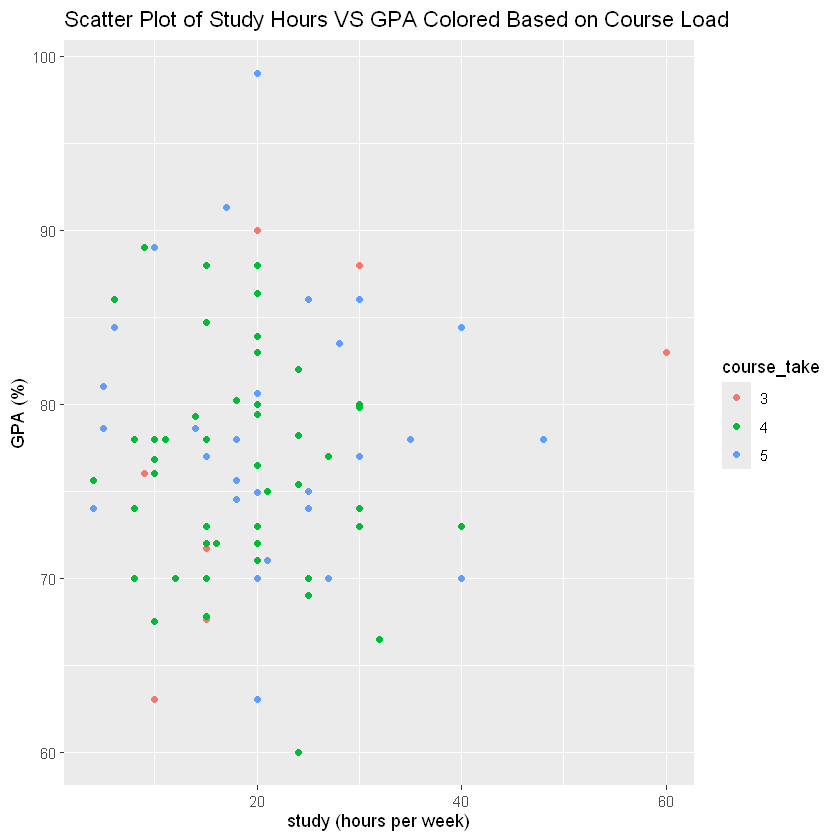

In [23]:
study <- df |>
    ggplot(aes(x = all_study, y = GPA_percent, color = course_take))+
    geom_point()+
    xlab("study (hours per week)") +
    ylab("GPA (%)")+
    ggtitle("Scatter Plot of Study Hours VS GPA Colored Based on Course Load")
study

In [24]:
r1a <- lm(GPA_percent ~ all_study, data = df)
r2a <- lm(GPA_percent ~ all_study + course_take, data = df)
r3a <- lm(GPA_percent ~ all_study + course_take + sleep, data = df)
r4a <- lm(GPA_percent ~ all_study + course_take + sleep + work, data = df)
r5a <- lm(GPA_percent ~ all_study + course_take + sleep + work + media, data = df)
r6a <- lm(GPA_percent ~ all_study + course_take + sleep + work + media + anxiety, data = df)

se1 <- sqrt(diag(vcovHC(r1a, type="HC1")))
se2 <- sqrt(diag(vcovHC(r2a, type="HC1")))
se3 <- sqrt(diag(vcovHC(r3a, type="HC1")))
se4 <- sqrt(diag(vcovHC(r4a, type="HC1")))
se5 <- sqrt(diag(vcovHC(r5a, type="HC1")))
se6 <- sqrt(diag(vcovHC(r6a, type="HC1")))

ses <- list(se1, se2, se3, se4, se5, se6)

stargazer(r1a, r2a, r3a, r4a, r5a, r6a, 
          se = ses,
          title = "Comparison of Regression Results",
          align = TRUE, 
          type = "text", 
          keep.stat = c("n", "rsq"))


Comparison of Regression Results
                                 Dependent variable:                    
             -----------------------------------------------------------
                                     GPA_percent                        
                (1)       (2)       (3)       (4)       (5)       (6)   
------------------------------------------------------------------------
all_study      0.006    -0.011    -0.011    -0.026    -0.012     0.019  
              (0.065)   (0.066)   (0.068)   (0.070)   (0.073)   (0.074) 
                                                                        
course_take4            -1.148    -1.136    -1.687    -2.229    -2.334  
                        (3.875)   (3.861)   (3.837)   (3.814)   (3.297) 
                                                                        
course_take5             1.185     1.198     0.853    -0.196    -1.059  
                        (3.971)   (4.024)   (3.891)   (3.795)   (3.381) 
                 

In [25]:
vif(r6a)

,GVIF,Df,GVIF^(1/(2*Df))
all_study,1.092178,1,1.045073
course_take,1.160083,2,1.037821
sleep,1.096758,1,1.047262
work,1.087993,1,1.043069
media,1.090501,1,1.044271
anxiety,1.056616,1,1.027918


No multicollinarity issues detected by the VIF table.

## 4.2 Tuition Model

In [26]:
r1b <- lm(GPA_percent ~ tuition, data = df)
r2b <- lm(GPA_percent ~ tuition + aid_coverage, data = df)
r3b <- lm(GPA_percent ~ tuition + aid_coverage + finance, data = df)
r4b <- lm(GPA_percent ~ tuition + aid_coverage + finance + work, data = df)
r5b <- lm(GPA_percent ~ tuition + aid_coverage + finance + work + media, data = df)
r6b <- lm(GPA_percent ~ tuition + aid_coverage + finance + work + media + anxiety, data = df)

se1b <- sqrt(diag(vcovHC(r1b, type="HC1")))
se2b <- sqrt(diag(vcovHC(r2b, type="HC1")))
se3b <- sqrt(diag(vcovHC(r3b, type="HC1")))
se4b <- sqrt(diag(vcovHC(r4b, type="HC1")))
se5b <- sqrt(diag(vcovHC(r5b, type="HC1")))
se6b <- sqrt(diag(vcovHC(r6b, type="HC1")))

sesb <- list(se1b, se2b, se3b, se4b, se5b, se6b)

stargazer(r1b, r2b, r3b, r4b, r5b, r6b,
          se = sesb,
          title = "Comparison of Regression Results 2",
          align = TRUE, 
          type = "text", 
          keep.stat = c("n", "rsq"))


Comparison of Regression Results 2
                                 Dependent variable:                    
             -----------------------------------------------------------
                                     GPA_percent                        
                (1)       (2)       (3)       (4)       (5)       (6)   
------------------------------------------------------------------------
tuition       -0.001*   -0.001    -0.001    -0.001    -0.001    -0.0004 
             (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004) 
                                                                        
aid_coverage            0.075**   0.075**   0.071**   0.059*     0.046  
                        (0.033)   (0.034)   (0.035)   (0.034)   (0.036) 
                                                                        
finance                           -0.113    -0.072    -0.126     0.220  
                                  (0.519)   (0.517)   (0.505)   (0.494) 
               

In [27]:
vif(r6b)

tuition aid_coverage      finance         work        media      anxiety 
    1.128980     1.127989     1.135214     1.043306     1.070400     1.126133

No multicollinarity issues detected by the VIF table.

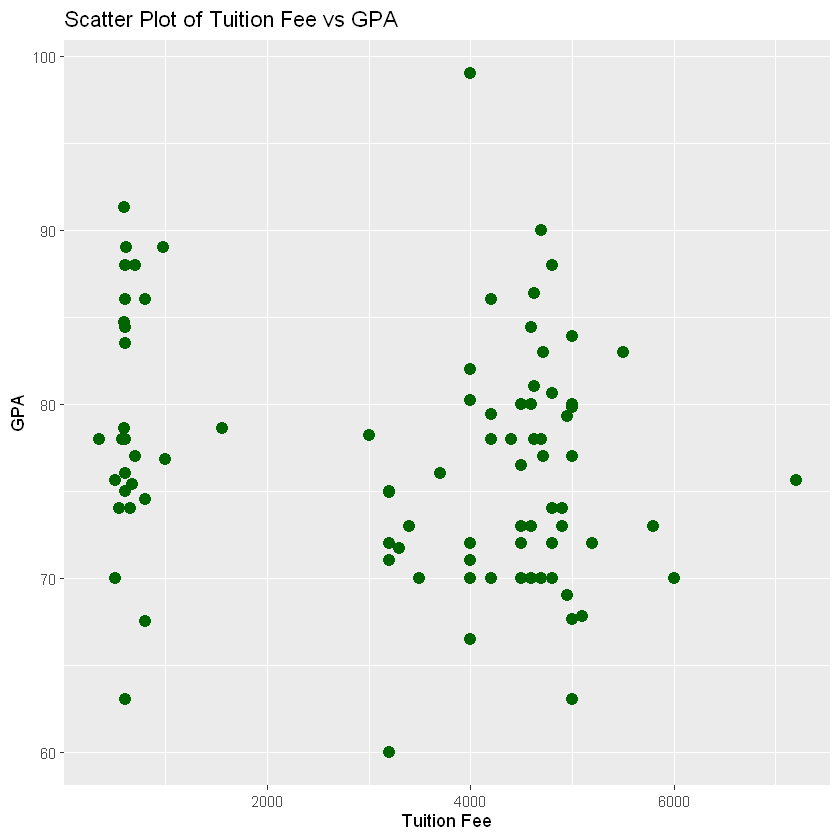

In [28]:
ggplot(df, aes(x = tuition, y = GPA_percent)) +
  geom_point(color = "darkgreen", size = 3) +
  ggtitle("Scatter Plot of Tuition Fee vs GPA") +
  xlab("Tuition Fee") +
  ylab("GPA")

## 4.3 Ftest

In [29]:
#1. tuition+study significance test
r2c <- lm(GPA_percent ~ tuition + all_study, data = df)
coeftest(r2c, vcov=vcovHC(r2c, type="HC1"))

linearHypothesis(r2c, c("tuition=0", "all_study=0"), white.adjust = "hc1")


t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)    
(Intercept) 78.92637868  1.99420514 39.5779  < 2e-16 ***
tuition     -0.00072866  0.00038100 -1.9125  0.05918 .  
all_study    0.01626731  0.06259127  0.2599  0.79557    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,87,NA,NA,NA
2,85,2,1.867157,0.1608464


In [30]:
r3c <- lm(GPA_percent ~ tuition + course_take, data = df) 
coeftest(r3c, vcov=vcovHC(r3c, type="HC1"))
linearHypothesis(r3c, c("tuition=0", "course_take4=0", "course_take5=0"), white.adjust = "hc1")


t test of coefficients:

                Estimate  Std. Error t value Pr(>|t|)    
(Intercept)  79.19948224  3.62208190 21.8657   <2e-16 ***
tuition      -0.00063115  0.00039270 -1.6072   0.1118    
course_take4 -0.97409944  3.69754997 -0.2634   0.7929    
course_take5  0.80588889  3.78094900  0.2131   0.8317    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,87,NA,NA,NA
2,84,3,1.668868,0.1798981


In [31]:
r4c <- lm(GPA_percent ~ tuition + aid_coverage, data = df) 
coeftest(r4c, vcov=vcovHC(r4c, type="HC1"))
linearHypothesis(r4c, c("aid_coverage=0", "tuition=0"), white.adjust = "hc1")


t test of coefficients:

                Estimate  Std. Error t value Pr(>|t|)    
(Intercept)  77.96743279  1.51961082 51.3075  < 2e-16 ***
tuition      -0.00053402  0.00037667 -1.4177  0.15992    
aid_coverage  0.07535044  0.03308797  2.2773  0.02528 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,87,NA,NA,NA
2,85,2,4.979331,0.009017463


## 4.4 Combined model & Final Table

In [32]:
r0d <- lm(GPA_percent ~ tuition, data = df)
r1d <- lm(GPA_percent ~ tuition + aid_coverage + all_study, data = df)
r2d <- lm(GPA_percent ~ tuition + aid_coverage + all_study, data = df)
r3d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take, data = df)
r4d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work, data = df)
r5d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work + media, data = df)
r6d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work + media + anxiety, data = df)

se0d <- sqrt(diag(vcovHC(r0d, type = "HC1")))
se1d <- sqrt(diag(vcovHC(r1d, type = "HC1")))
se2d <- sqrt(diag(vcovHC(r2d, type = "HC1")))
se3d <- sqrt(diag(vcovHC(r3d, type = "HC1")))
se4d <- sqrt(diag(vcovHC(r4d, type = "HC1")))
se5d <- sqrt(diag(vcovHC(r5d, type = "HC1")))
se6d <- sqrt(diag(vcovHC(r6d, type = "HC1")))

sesd <- list(se0d, se1d, se2d, se3d, se4d, se5d, se6d)
stargazer(r0d, r1d, r2d, r3d, r4d, r5d, r6d,
          se = sesd,
          title = "Comparison of Regression Results 3",
          align = TRUE, 
          type = "text", 
          keep.stat = c("n", "rsq"))



Comparison of Regression Results 3
                                      Dependent variable:                         
             ---------------------------------------------------------------------
                                          GPA_percent                             
                (1)       (2)       (3)       (4)       (5)       (6)       (7)   
----------------------------------------------------------------------------------
tuition       -0.001*   -0.001    -0.001    -0.0005   -0.001    -0.0005   -0.0004 
             (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004) 
                                                                                  
aid_coverage            0.075**   0.075**   0.072**   0.067*     0.056     0.043  
                        (0.033)   (0.033)   (0.034)   (0.036)   (0.035)   (0.036) 
                                                                                  
all_study                0.016     0.016     0.005 

# 5. Specifications and Robustness Check

## 5.1 Specifications Test

In [42]:
vif(r6d)

,GVIF,Df,GVIF^(1/(2*Df))
tuition,1.120108,1,1.058352
aid_coverage,1.137676,1,1.066619
all_study,1.084411,1,1.041351
course_take,1.177737,2,1.041747
work,1.097356,1,1.047548
media,1.096064,1,1.046931
anxiety,1.093550,1,1.045729


In [34]:
r6d_aid_coverage_work <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work + media + anxiety + aid_coverage:work, data = df)

In [35]:
coeftest(r6d_aid_coverage_work, vcov=vcovHC(r6d_aid_coverage_work, type="HC1"))
linearHypothesis(r6d_aid_coverage_work, c("aid_coverage:work=0"), white.adjust = "hc1")


t test of coefficients:

                     Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)       84.70122333  4.54592039 18.6324 < 2.2e-16 ***
tuition           -0.00040571  0.00039692 -1.0221  0.309880    
aid_coverage       0.02629166  0.03589012  0.7326  0.466023    
all_study          0.00597999  0.06882900  0.0869  0.930988    
course_take4      -2.61487735  3.17484496 -0.8236  0.412665    
course_take5      -1.60487312  3.15577310 -0.5086  0.612502    
work              -0.19534137  0.14280546 -1.3679  0.175276    
media              0.00602600  0.00221278  2.7233  0.007973 ** 
anxiety           -1.67648396  0.68289538 -2.4550  0.016316 *  
aid_coverage:work  0.02858971  0.01256406  2.2755  0.025620 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,79,NA,NA,NA
2,78,1,5.17797,0.02561994


In [46]:
r0d <- lm(GPA_percent ~ tuition, data = df)
r1d <- lm(GPA_percent ~ tuition + aid_coverage + all_study, data = df)
r2d <- lm(GPA_percent ~ tuition + aid_coverage + all_study, data = df)
r3d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take, data = df)
r4d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work, data = df)
r5d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work + media, data = df)
r6d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work + media + anxiety, data = df)
r7d <- lm(GPA_percent ~ tuition + aid_coverage + all_study + course_take + work + media + anxiety + aid_coverage:work, data = df)

se0d <- sqrt(diag(vcovHC(r0d, type = "HC1")))
se1d <- sqrt(diag(vcovHC(r1d, type = "HC1")))
se2d <- sqrt(diag(vcovHC(r2d, type = "HC1")))
se3d <- sqrt(diag(vcovHC(r3d, type = "HC1")))
se4d <- sqrt(diag(vcovHC(r4d, type = "HC1")))
se5d <- sqrt(diag(vcovHC(r5d, type = "HC1")))
se6d <- sqrt(diag(vcovHC(r6d, type = "HC1")))
se7d <- sqrt(diag(vcovHC(r7d, type = "HC1")))

sesd <- list(se0d, se1d, se2d, se3d, se4d, se5d, se6d, se7d)
stargazer(r0d, r1d, r2d, r3d, r4d, r5d, r6d, r7d,
          se = sesd,
          title = "Comparison of Regression Results 3",
          align = TRUE, 
          type = "text", 
          keep.stat = c("n", "rsq"))


Comparison of Regression Results 3
                                                Dependent variable:                              
                  -------------------------------------------------------------------------------
                                                    GPA_percent                                  
                     (1)       (2)       (3)       (4)       (5)       (6)       (7)       (8)   
-------------------------------------------------------------------------------------------------
tuition            -0.001*   -0.001    -0.001    -0.0005   -0.001    -0.0005   -0.0004   -0.0004 
                  (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004)  (0.0004) 
                                                                                                 
aid_coverage                 0.075**   0.075**   0.072**   0.067*     0.056     0.043     0.026  
                             (0.033)   (0.033)   (0.034)   (0.036)   (0.035)   (0.

In [41]:
vif(r6d_aid_coverage_work)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
tuition,1.123583,1,1.059992
aid_coverage,1.207560,1,1.098890
all_study,1.103814,1,1.050625
course_take,1.200290,2,1.046698
work,1.288199,1,1.134989
media,1.096384,1,1.047084
anxiety,1.112527,1,1.054764
aid_coverage:work,1.239123,1,1.113159


In [40]:
#hetero for combine model
h1 <- bptest(r6d, ~ fitted(r6d) + I(fitted(r6d)^2))
h2 <- bptest(r6d_aid_coverage_work, ~ fitted(r6d_aid_coverage_work) + I(fitted(r6d_aid_coverage_work)^2))
h1
h2


	studentized Breusch-Pagan test

data:  r6d
BP = 1.1707, df = 2, p-value = 0.5569



	studentized Breusch-Pagan test

data:  r6d_aid_coverage_work
BP = 1.6611, df = 2, p-value = 0.4358


## 5.2 Robustness Check

In [36]:
robustness_aid <- lm(GPA_percent ~ tuition + aid + all_study + course_take + work + media + anxiety, data = df)
robustness_aid_2 <- lm(GPA_percent ~ tuition + aid + all_study + course_take + work + media + anxiety + aid:work, data = df)
robustness_aid_3 <- lm(GPA_percent ~ tuition + aid + all_study + course_take + work + media + anxiety + aid_coverage:work, data = df)

In [37]:
AIC(r6d, robustness_aid, robustness_aid_2, robustness_aid_3)

,df,AIC
,<dbl>,<dbl>
r6d,10,587.8626
robustness_aid,10,584.7315
robustness_aid_2,11,583.5658
robustness_aid_3,11,583.9017


In [44]:
robust_scale1 <- lm(GPA_scale ~ tuition + aid + all_study + course_take + work + media + anxiety, data = df)
robust_scale2 <- lm(GPA_scale ~ tuition + aid + all_study + course_take + work + media + anxiety + aid_coverage:work, data = df)
AIC(r6d, r6d_aid_coverage_work, robust_scale1, robust_scale2)

,df,AIC
,<dbl>,<dbl>
r6d,10,587.8626
r6d_aid_coverage_work,11,585.5118
robust_scale1,10,117.9951
robust_scale2,11,119.9940


In [45]:
robust1 <- lm(GPA_percent ~ tuition + aid + all_study + course_take + club + media + anxiety, data = df)
robust2 <- lm(GPA_percent ~ tuition + aid + all_study + course_take + club + media + anxiety + aid_coverage:work, data = df)
AIC(r6d, r6d_aid_coverage_work, robust1, robust2)

,df,AIC
,<dbl>,<dbl>
r6d,10,587.8626
r6d_aid_coverage_work,11,585.5118
robust1,10,582.5624
robust2,11,583.3468
